In [1]:
!pip install roboflow
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.0 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="5eACDsbc5Wluc2g9Dne9")
project = rf.workspace("blue-halo").project("vegetation-segmentation")
version = project.version(4)

# Download dataset in YOLOv8 format
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [4]:
import os

# Root folder of downloaded dataset
dataset_path = dataset.location
print("Dataset folder:", dataset_path)

# Paths to images
train_path = os.path.join(dataset_path, "train/images")
valid_path = os.path.join(dataset_path, "valid/images")
test_path  = os.path.join(dataset_path, "test/images")

print("Train images path:", train_path)
print("Valid images path:", valid_path)
print("Test images path:", test_path)

# Path to data.yaml
yaml_path = os.path.join(dataset_path, "data.yaml")
print("YOLOv8 data.yaml path:", yaml_path)


Dataset folder: /content/vegetation-segmentation-4
Train images path: /content/vegetation-segmentation-4/train/images
Valid images path: /content/vegetation-segmentation-4/valid/images
Test images path: /content/vegetation-segmentation-4/test/images
YOLOv8 data.yaml path: /content/vegetation-segmentation-4/data.yaml


In [7]:
from ultralytics import YOLO
model = YOLO("yolov8n-seg.pt")

model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    project="veg_seg",
    name="yolov8-veg",
    device=0
)


Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vegetation-segmentation-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8-veg, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fad2a4f5340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [8]:
metrics = model.val()  # validation metrics including mAP, precision, recall
print(metrics)


Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1747.0±660.5 MB/s, size: 133.2 KB)
val: Scanning /content/vegetation-segmentation-4/valid/labels.cache... 83 images, 10 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 83/83 97.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.2s/it 7.0s
                   all         83        205      0.783       0.61      0.716      0.495      0.777      0.605      0.709       0.45
Speed: 9.4ms preprocess, 14.7ms inference, 0.0ms loss, 9.5ms postprocess per image
Results saved to /content/runs/segment/val
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.


image 1/1 /content/veg_test.jpg: 640x640 5 vegetations, 9.1ms
Speed: 4.4ms preprocess, 9.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Vegetation coverage: 7.31%


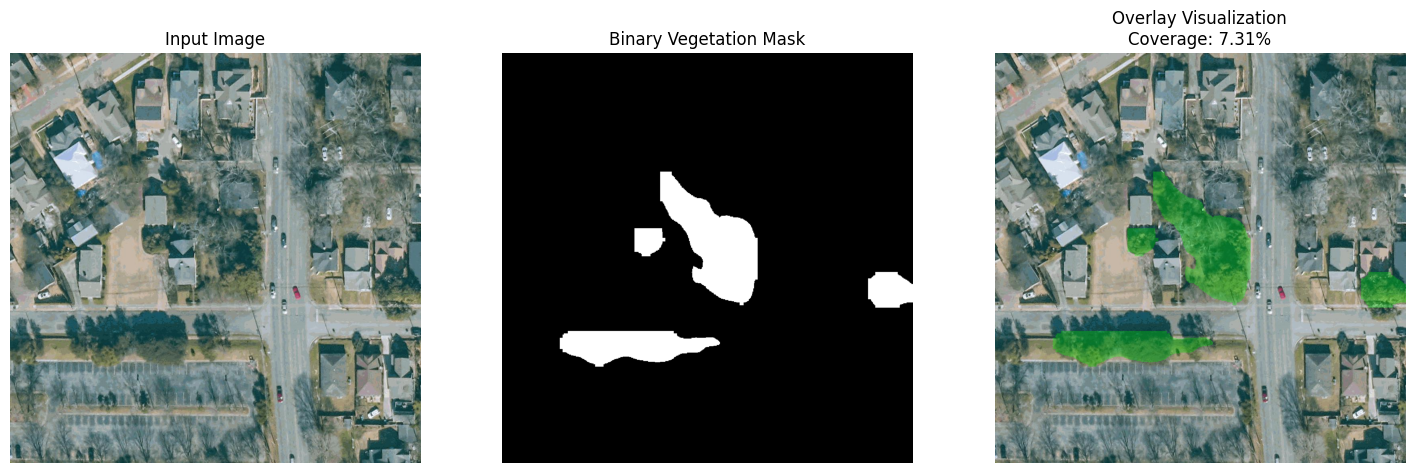

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load trained model
model = YOLO("veg_seg/yolov8-veg/weights/best.pt")

# Load test image
test_image = "veg_test.jpg"  # replace with your image path
img = cv2.imread(test_image)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img_rgb.shape

# Run inference
results = model.predict(test_image, conf=0.25)
result = results[0]

# Get masks and combine into one binary mask
masks = result.masks.data.cpu().numpy()  # (num_masks, H_mask, W_mask)
binary_mask = np.zeros_like(masks[0], dtype=np.uint8)
for mask in masks:
    binary_mask = np.maximum(binary_mask, mask.astype(np.uint8))

# Resize mask to original image size
binary_mask_resized = cv2.resize(binary_mask, (w, h), interpolation=cv2.INTER_NEAREST)

# Vegetation coverage
coverage = np.sum(binary_mask_resized) / (binary_mask_resized.shape[0] * binary_mask_resized.shape[1]) * 100
print(f"Vegetation coverage: {coverage:.2f}%")

# Overlay mask on original image
overlay = img_rgb.copy()
overlay[binary_mask_resized == 1] = [0, 255, 0]  # green for vegetation
overlay_img = cv2.addWeighted(img_rgb, 0.7, overlay, 0.3, 0)

# Plot in report style
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(img_rgb)
axes[0].set_title("Input Image")
axes[0].axis('off')

axes[1].imshow(binary_mask_resized, cmap='gray')
axes[1].set_title("Binary Vegetation Mask")
axes[1].axis('off')

axes[2].imshow(overlay_img)
axes[2].set_title(f"Overlay Visualization\nCoverage: {coverage:.2f}%")
axes[2].axis('off')

plt.show()
